In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

from bandits import linucb, thompson_sampling, ucb1, egreedy
from evaluator import evaluate
import dataset
from matplotlib import pyplot as plt
import copy
import numpy as np
import pandas as pd

In [2]:
files = ("ydata-fp-td-clicks-v1_0.20090509",)
dataset.get_yahoo_events(files)

3618698 events with 44 articles


In [3]:
articles_all, features_all, events_all = list(dataset.articles),np.copy(dataset.features),copy.deepcopy(dataset.events)

In [4]:
def test_max_articles(max_articles):
    dataset.max_articles(max_articles)
    rnd_score, _ = evaluate(egreedy(1), mode="learn")
    
    
    bandits = [egreedy(0.1),thompson_sampling(),ucb1(0.3),linucb(0.3)]
    alg_names = [x.algorithm for x in bandits]
    
    ctrs = []
    for bandit in bandits:
        evaluate(bandit, mode="learn")
        ctr, _ = evaluate(bandit, mode="deploy")
        ctrs.append(ctr/rnd_score)
    
    plt.bar(alg_names, ctrs)
    plt.ylabel("CTR Lift")
    plt.title(str(max_articles)+" articles")
    plt.show()

Number of events: 3391094
learn     egreedy (ε=1)       0.023     1.4s
learn     egreedy (ε=0.1)     0.031     1.8s
deploy    egreedy (ε=0.1)     0.043     11.4s
learn     TS                  0.027     6.3s
deploy    TS                  0.042     51.6s
learn     UCB1 (α=0.3)        0.025     3.3s
deploy    UCB1 (α=0.3)        0.039     24.7s
learn     LinUCB (α=0.3)      0.048     32.9s
deploy    LinUCB (α=0.3)      0.045     4.9m


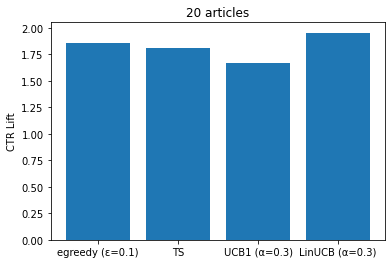

In [5]:
# dataset.articles,dataset.features,dataset.events = list(articles_all), np.copy(features_all), copy.deepcopy(events_all)
test_max_articles(20)

Number of events: 1717102
learn     egreedy (ε=1)       0.019     0.7s
learn     egreedy (ε=0.1)     0.027     1.0s
deploy    egreedy (ε=0.1)     0.042     5.9s
learn     TS                  0.028     3.0s
deploy    TS                  0.044     24.0s
learn     UCB1 (α=0.3)        0.023     1.7s
deploy    UCB1 (α=0.3)        0.044     12.4s
learn     LinUCB (α=0.3)      0.035     11.7s
deploy    LinUCB (α=0.3)      0.044     1.7m


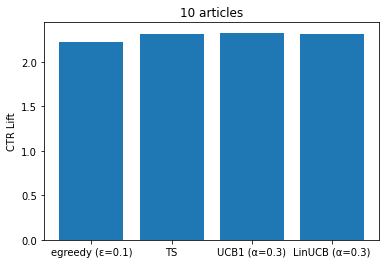

In [6]:
dataset.articles,dataset.features,dataset.events = list(articles_all), np.copy(features_all), copy.deepcopy(events_all)
test_max_articles(10)

Number of events: 859294
learn     egreedy (ε=1)       0.022     0.4s
learn     egreedy (ε=0.1)     0.03      0.5s
deploy    egreedy (ε=0.1)     0.04      3.1s
learn     TS                  0.028     1.5s
deploy    TS                  0.041     11.7s
learn     UCB1 (α=0.3)        0.021     0.9s
deploy    UCB1 (α=0.3)        0.043     6.3s
learn     LinUCB (α=0.3)      0.028     4.8s
deploy    LinUCB (α=0.3)      0.041     41.7s


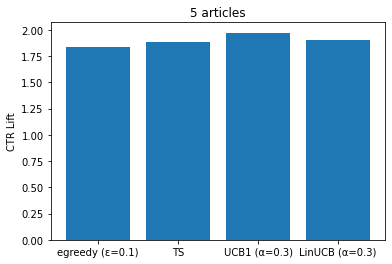

In [7]:
dataset.articles,dataset.features,dataset.events = list(articles_all), np.copy(features_all), copy.deepcopy(events_all)
test_max_articles(5)